/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


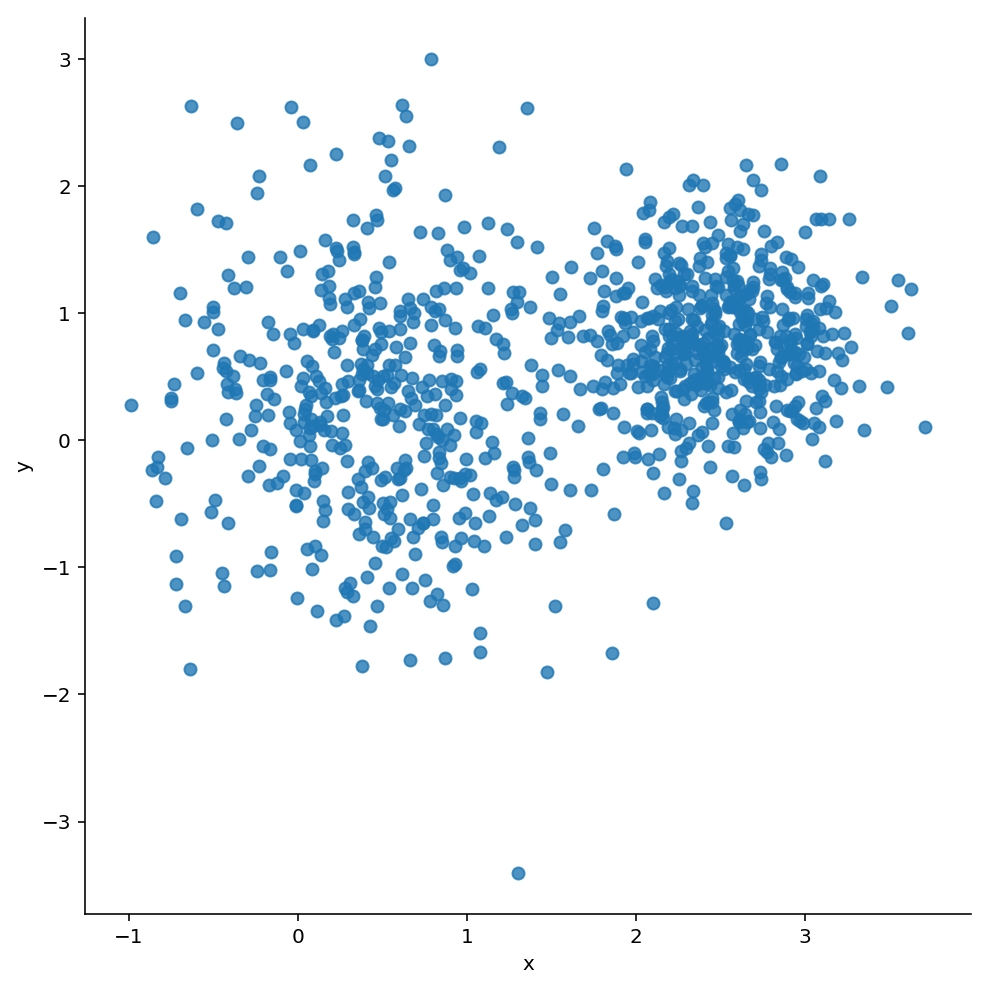

num_clusters 3
[[ 0.36456034  0.96818185]
 [ 2.468938    0.7897961 ]
 [ 0.5483859  -0.47022793]]


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


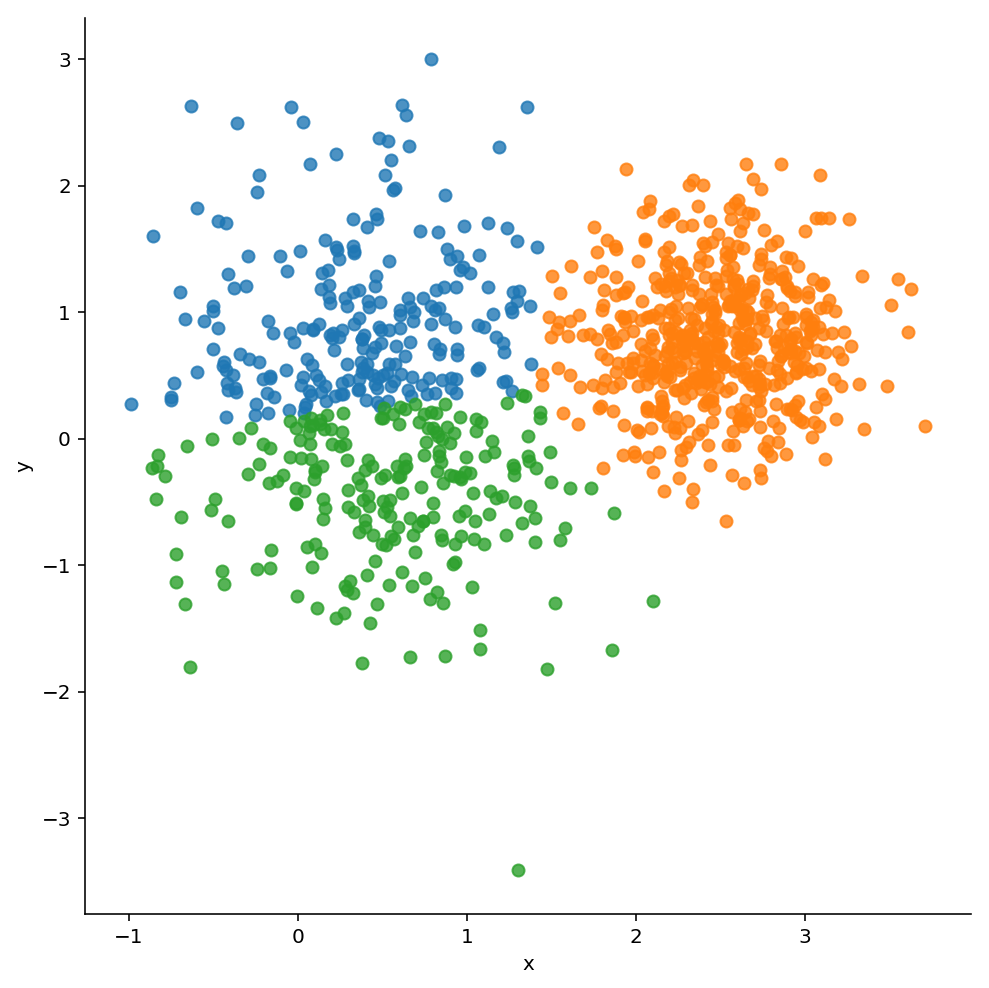

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
num_vectors = 1000
num_clusters = 3
num_steps = 100
vector_values = []
for i in range(num_vectors):
  if np.random.random() > 0.5:
    vector_values.append([np.random.normal(0.5, 0.6),
                          np.random.normal(0.3, 0.9)])
  else:
    vector_values.append([np.random.normal(2.5, 0.4),
                         np.random.normal(0.8, 0.5)])
df = pd.DataFrame({"x": [v[0] for v in vector_values], 
                   "y": [v[1] for v in vector_values]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=7)
plt.show()
vectors = tf.constant(vector_values)
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), 
                                 [0,0],[num_clusters,-1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

#print expanded_vectors.get_shape()
#print expanded_centroids.get_shape()

distances = tf.reduce_sum(
  tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

print('num_clusters '+str(num_clusters))

means = tf.concat([
    tf.reduce_mean(
        tf.gather(vectors,
                  tf.reshape(
                    tf.where(
                      tf.equal(assignments, c)
                    ),[1,-1])
                 ),reduction_indices=[1])
    for c in range(num_clusters)], 0)


update_centroids = tf.assign(centroids, means)
init_op = tf.initialize_all_variables()

#with tf.Session('local') as sess:
sess = tf.Session()
sess.run(init_op)

for step in range(num_steps):
   _, centroid_values, assignment_values = sess.run([update_centroids,
                                                    centroids,
                                                    assignments])
# print "centroids"
print(centroid_values)


data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
  data["x"].append(vector_values[i][0])
  data["y"].append(vector_values[i][1])
  data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, 
           fit_reg=False, size=7, 
           hue="cluster", legend=False)
plt.show()